In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [172]:
df = pd.read_csv(r'C:\Users\shabn\Downloads\customer_churn.csv')

In [173]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [174]:
df.shape

(7043, 21)

In [175]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [176]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [177]:
print(df["gender"].unique())


['Female' 'Male']


In [178]:
print(df["SeniorCitizen"].unique())

[ 0.  1. nan]


In [179]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges","customerID"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)


gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [ 0.  1. nan]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes' nan]
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes' nan]
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No' nan]
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service' nan]
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service' nan]
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service' nan]
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service' nan]
--------------------------------------------------
S

In [180]:
#Check for null values
print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64


In [181]:
df[df["TotalCharges"]==" "]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0.0,No,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0.0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [182]:
df['TotalCharges'].fillna(0, inplace=True)


C:\Users\shabn\AppData\Local\Temp\ipykernel_13288\4062339387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [183]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [184]:
for i in [ 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']:
    df[i].fillna(df[i].mode()[0], inplace=True)


C:\Users\shabn\AppData\Local\Temp\ipykernel_13288\2483504590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [185]:
print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              13
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        1
MonthlyCharges      16
TotalCharges         0
Churn                0
dtype: int64


In [186]:
df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0], inplace=True)


C:\Users\shabn\AppData\Local\Temp\ipykernel_13288\228598712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0], inplace=True)


In [187]:
df['tenure'].fillna(df['tenure'].mean(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)


C:\Users\shabn\AppData\Local\Temp\ipykernel_13288\2245855062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenure'].fillna(df['tenure'].mean(), inplace=True)
C:\Users\shabn\AppData\Local\Temp\ipykernel_13288\2245855062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [188]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [189]:
# checking the class distribution of target column
print(df["Churn"].value_counts())


Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [190]:
df.drop('customerID',axis=1)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Exploratory Data Analysis


In [192]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.161863,32.367568,64.757855
std,0.368351,24.537963,30.057640
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.575000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [193]:
#Numerical Features
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()


In [194]:
#Boxplot of numerical columns
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show


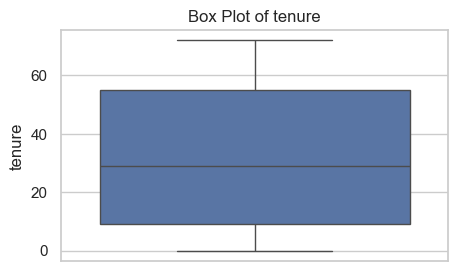

In [195]:
plot_boxplot(df, "tenure")


In [196]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols
object_cols


['SeniorCitizen',
 'customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

Encoding


In [198]:
#Label encoding of target column
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})
 

C:\Users\shabn\AppData\Local\Temp\ipykernel_13288\3641294562.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [199]:
print(df["Churn"].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


In [200]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns


In [201]:
print(object_columns)


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')


In [208]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column].astype(str))
  encoders[column] = label_encoder


In [210]:
# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [212]:
encoders


{'customerID': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'TotalCharges': LabelEncoder()}

In [214]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4863,0,0.0,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2504,0
1,3293,1,0.0,0,0,34.0,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1465,0
2,1740,1,0.0,0,0,2.0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,158,1
3,5041,1,0.0,0,0,45.0,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1399,0
4,6126,0,0.0,0,0,2.0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [216]:
df.drop('customerID',axis=1)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2504,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1465,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,158,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1399,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1596,0
7039,0,0.0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5696,0
7040,0,0.0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2993,0
7041,1,1.0,1,0,4.0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2659,1


Train-Test Split


In [219]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]


In [221]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [223]:
print(y_train.shape)


(5634,)


In [225]:
print(y_train.value_counts())


Churn
0    4138
1    1496
Name: count, dtype: int64


In [227]:
smote = SMOTE(random_state=42)

In [229]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [231]:
print(y_train_smote.shape)


(8276,)


In [233]:
print(y_train_smote.value_counts())


Churn
0    4138
1    4138
Name: count, dtype: int64


In [235]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}


In [237]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)
 

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [238]:
cv_scores


{'Decision Tree': array([0.66425121, 0.69425982, 0.83141994, 0.83806647, 0.84954683]),
 'Random Forest': array([0.72282609, 0.75226586, 0.9141994 , 0.90271903, 0.91722054])}

Random Forest Model


In [240]:
rfc = RandomForestClassifier(random_state=42)


In [244]:
rfc.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [246]:
print(y_test.value_counts())


Churn
0    1036
1     373
Name: count, dtype: int64


Model Evaluation

In [249]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
 

Accuracy Score:
 0.7821149751596878
Confsuion Matrix:
 [[879 157]
 [150 223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.60      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



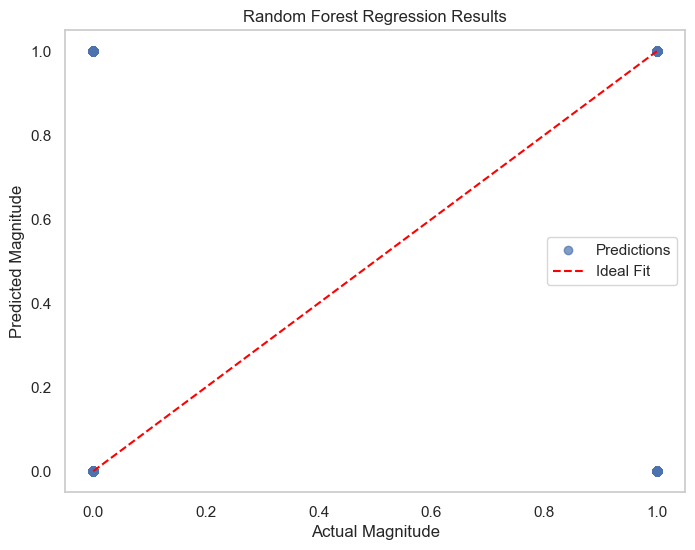

In [251]:
# Plot the predicted and actual values
# Plotting the predicted vs actual magnitudes for the Random Forest model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.legend()
plt.grid()
plt.show()
     
